In [1]:
import datetime
import os
import numpy
import pandas

#### Data retrieval from yahoo finance

In [2]:
pip install pandas-datareader --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 5.0 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [3]:
import pandas_datareader as pdr
pdr.__version__

'0.10.0'

In [4]:
# retrieve data from yahoo finance
tickers = ['BTC-USD']
start_date = datetime.datetime(2017, 1, 1)
end_date = datetime.datetime(2022, 1, 1)

df = pdr.get_data_yahoo(tickers, start=datetime.datetime(2018, 1, 1), end=datetime.datetime(2020, 12, 2))
df.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2018-01-01,13657.200195,13657.200195,14112.200195,13154.700195,14112.200195,10291200000
2018-01-02,14982.099609,14982.099609,15444.599609,13163.599609,13625.000000,16846600192
2018-01-03,15201.000000,15201.000000,15572.799805,14844.500000,14978.200195,16871900160
2018-01-04,15599.200195,15599.200195,15739.700195,14522.200195,15270.700195,21783199744
2018-01-05,17429.500000,17429.500000,17705.199219,15202.799805,15477.200195,23840899072


In [5]:
df = df.droplevel('Symbols', axis='columns')
df.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2018-01-01,13657.200195,13657.200195,14112.200195,13154.700195,14112.200195,10291200000
2018-01-02,14982.099609,14982.099609,15444.599609,13163.599609,13625.000000,16846600192
2018-01-03,15201.000000,15201.000000,15572.799805,14844.500000,14978.200195,16871900160
2018-01-04,15599.200195,15599.200195,15739.700195,14522.200195,15270.700195,21783199744
2018-01-05,17429.500000,17429.500000,17705.199219,15202.799805,15477.200195,23840899072


In [6]:
df = df.rename_axis(None, axis=1)
df.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2018-01-01,13657.200195,13657.200195,14112.200195,13154.700195,14112.200195,10291200000
2018-01-02,14982.099609,14982.099609,15444.599609,13163.599609,13625.000000,16846600192
2018-01-03,15201.000000,15201.000000,15572.799805,14844.500000,14978.200195,16871900160
2018-01-04,15599.200195,15599.200195,15739.700195,14522.200195,15270.700195,21783199744
2018-01-05,17429.500000,17429.500000,17705.199219,15202.799805,15477.200195,23840899072


In [7]:
df = df.reset_index()
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2018-01-01,13657.200195,13657.200195,14112.200195,13154.700195,14112.200195,10291200000
1,2018-01-02,14982.099609,14982.099609,15444.599609,13163.599609,13625.000000,16846600192
2,2018-01-03,15201.000000,15201.000000,15572.799805,14844.500000,14978.200195,16871900160
3,2018-01-04,15599.200195,15599.200195,15739.700195,14522.200195,15270.700195,21783199744
4,2018-01-05,17429.500000,17429.500000,17705.199219,15202.799805,15477.200195,23840899072


#### Data retrieval from csv file

In [18]:
df = pandas.read_csv(r'https://raw.githubusercontent.com/MarcoCalbucci/DataAnalytics/main/Pandas/Esempi/Esempio%20financial%20data/BTC-USD_weekly.csv')

#### Resampling
*   resample day --> week
*   shift -6 day

In [9]:
# Column date must have date format
df['Date'] = pandas.to_datetime(df['Date'])

In [10]:
df = df.resample('W-TUE', on = 'Date')\
       .agg({'Open': 'first', 'High': 'max', 'Low': 'min' , 'Close': 'last', 'Adj Close': 'last','Volume': 'sum'})\
       .reset_index()
 # 'W' --> 'W-SUN'
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
149,2020-11-10,13950.488281,15903.437500,13580.471680,15290.902344,15290.902344,237191610816
150,2020-11-17,15290.909180,17782.919922,15290.006836,17645.406250,17645.406250,217216819013
151,2020-11-24,17645.191406,19348.271484,17352.906250,19107.464844,19107.464844,298184051823
152,2020-12-01,19104.410156,19845.974609,16351.035156,18802.998047,18802.998047,305090825302
153,2020-12-08,18801.744141,19566.191406,18347.718750,19445.398438,19445.398438,69318014544


In [11]:
df['Date'] = df['Date'] + pandas.Timedelta(value=-6, unit='D')
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
149,2020-11-04,13950.488281,15903.437500,13580.471680,15290.902344,15290.902344,237191610816
150,2020-11-11,15290.909180,17782.919922,15290.006836,17645.406250,17645.406250,217216819013
151,2020-11-18,17645.191406,19348.271484,17352.906250,19107.464844,19107.464844,298184051823
152,2020-11-25,19104.410156,19845.974609,16351.035156,18802.998047,18802.998047,305090825302
153,2020-12-02,18801.744141,19566.191406,18347.718750,19445.398438,19445.398438,69318014544


In [12]:
# retrieve data from csv file
os.chdir("/content/drive/MyDrive/Laboratorio data analytics/Esempio financial data")
df_weekly = pandas.read_csv("BTC-USD_weekly.csv")
df_weekly.tail()

FileNotFoundError: ignored

#### Plotting

In [13]:
import matplotlib.pyplot as plt

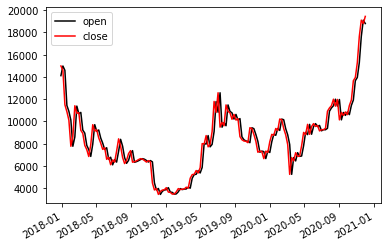

In [14]:
fig, ax = plt.subplots()
plt.plot(pandas.to_datetime(df['Date']), df['Open'], marker='', linestyle='-', color = 'black', label = 'open')
plt.plot(pandas.to_datetime(df['Date']), df['Close'], marker='', linestyle='-', color = 'red', label = 'close')

fig.autofmt_xdate() # per distanziare automaticamente le date

plt.legend()
plt.show()